In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.shape

(750000, 18)

In [4]:
df.isnull().sum()

id           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [5]:
for col in df.columns:
    print(f"{col}, {df[col].unique()}")

id, [     0      1      2 ... 749997 749998 749999]
age, [42 38 36 27 26 24 39 50 46 32 37 57 33 47 35 49 77 40 54 56 51 30 67 58
 59 45 43 29 48 31 28 34 60 52 41 81 23 62 53 72 55 25 44 61 63 69 75 71
 64 22 83 70 80 21 65 74 68 19 73 66 79 20 84 86 76 18 82 78 87 85 88 94
 93 89 92 95 90 91]
job, ['technician' 'blue-collar' 'student' 'admin.' 'management' 'entrepreneur'
 'self-employed' 'unknown' 'services' 'retired' 'housemaid' 'unemployed']
marital, ['married' 'single' 'divorced']
education, ['secondary' 'primary' 'tertiary' 'unknown']
default, ['no' 'yes']
balance, [    7   514   602 ... 13023  4003  8218]
housing, ['no' 'yes']
loan, ['no' 'yes']
contact, ['cellular' 'unknown' 'telephone']
day, [25 18 14 28  3 20 21 31  4  8  5 24 11 12 26 30  6 10 19 17  2 13 29 23
 27  7  9 16  1 22 15]
month, ['aug' 'jun' 'may' 'feb' 'apr' 'nov' 'jul' 'jan' 'oct' 'mar' 'sep' 'dec']
duration, [ 117  185  111 ... 4817 2455 2040]
campaign, [ 3  1  2 25  5  7  4 11  6  9  8 16 10 15 12 13 19 17 14

In [6]:
df.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1


In [7]:
numerical_features = [col for col in df.columns if df[col].dtype !='O']
categorical_features = [col for col in df.columns if df[col].dtype =='O']

In [8]:
print(f"Numerical features: {numerical_features}")
print(f"Categorical features: {categorical_features}")

Numerical features: ['id', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y']
Categorical features: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


In [9]:
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

#### To check for the duplicate records

In [10]:
print(df.duplicated().sum())

0


#### Look for Constant or Low-Variance Columns

Columns with the same value for all rows are useless for modeling.

In [11]:
df.nunique()

id           750000
age              78
job              12
marital           3
education         4
default           2
balance        8217
housing           2
loan              2
contact           3
day              31
month            12
duration       1760
campaign         52
pdays           596
previous         50
poutcome          4
y                 2
dtype: int64

#### Checking Age for the outliers

<Axes: xlabel='age', ylabel='Count'>

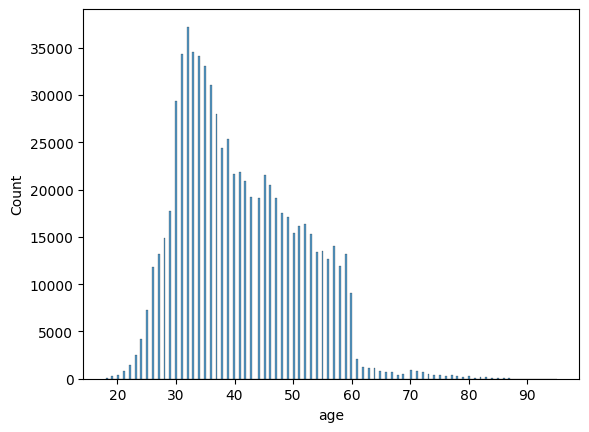

In [12]:
sns.histplot(data=df['age'])

In [13]:
# Dropping the id ,so it wont be used in the prediction
df.drop(columns=['id'],inplace=True)

In [14]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749995,29,services,single,secondary,no,1282,no,yes,unknown,4,jul,1006,2,-1,0,unknown,1
749996,69,retired,divorced,tertiary,no,631,no,no,cellular,19,aug,87,1,-1,0,unknown,0
749997,50,blue-collar,married,secondary,no,217,yes,no,cellular,17,apr,113,1,-1,0,unknown,0
749998,32,technician,married,secondary,no,-274,no,no,cellular,26,aug,108,6,-1,0,unknown,0


In [15]:
df['y'].value_counts()

y
0    659512
1     90488
Name: count, dtype: int64

Hence as conclusion the dataset is purely imbalanced!!!

In [16]:
from imblearn.over_sampling import SMOTENC
from sklearn.preprocessing import LabelEncoder
label_encoder = {}

<Axes: xlabel='duration', ylabel='Count'>

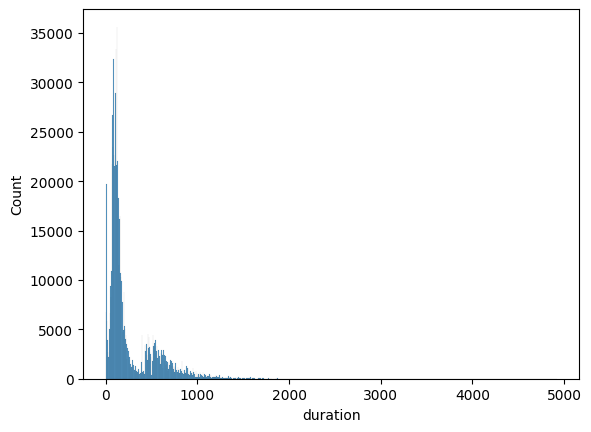

In [17]:
sns.histplot(data=df['duration'])

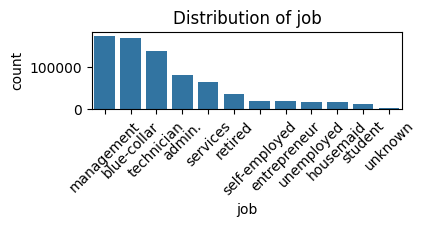

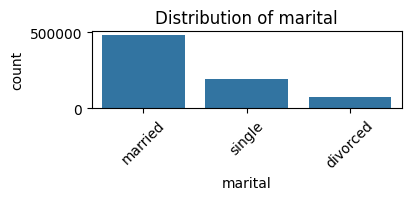

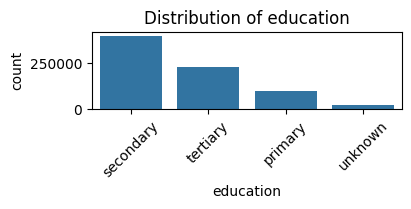

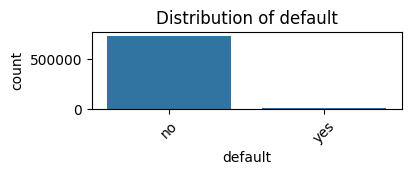

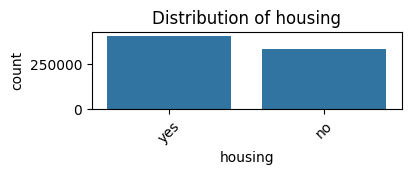

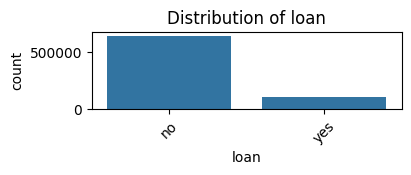

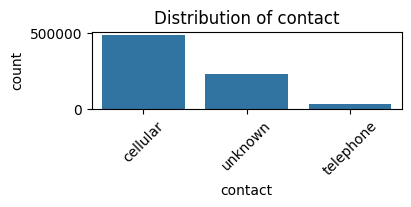

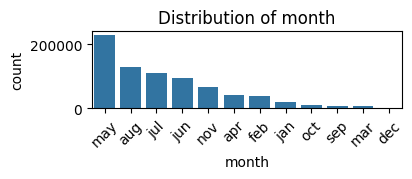

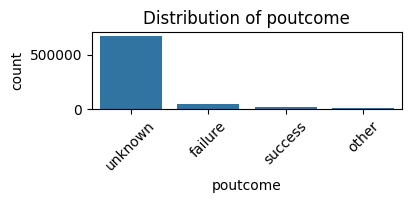

In [18]:
for col in categorical_features:
    plt.figure(figsize=(4,1))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

In [19]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous,y
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,40.926395,1204.067397,16.117209,256.229144,2.577008,22.412733,0.298545,0.120651
std,10.098829,2836.096759,8.250832,272.555662,2.718514,77.319998,1.335926,0.325721
min,18.000000,-8019.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,0.000000,9.000000,91.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,634.000000,17.000000,133.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1390.000000,21.000000,361.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,99717.000000,31.000000,4918.000000,63.000000,871.000000,200.000000,1.000000


In [20]:
df[df.isnull()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
749996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
749997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
749998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
import seaborn as sns

<Axes: xlabel='y', ylabel='Count'>

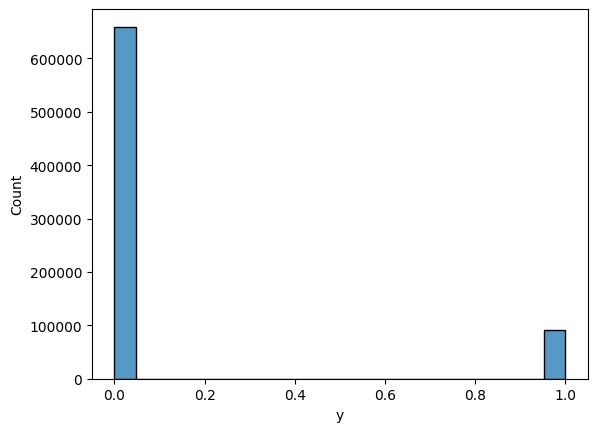

In [22]:
sns.histplot(df['y'])

In [23]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1
5,24,admin.,single,secondary,no,1882,yes,no,cellular,20,apr,1010,3,-1,0,unknown,0
6,39,blue-collar,married,secondary,no,0,no,no,telephone,21,nov,90,1,-1,0,unknown,0
7,50,admin.,single,secondary,no,1595,no,no,telephone,31,jul,49,25,-1,0,unknown,0
8,46,blue-collar,married,primary,no,1463,no,no,cellular,4,aug,50,1,-1,0,unknown,0
9,39,management,divorced,tertiary,no,25,yes,no,cellular,8,may,119,1,-1,0,unknown,0


In [24]:
df['loan'].unique()

array(['no', 'yes'], dtype=object)

In [25]:
df['loan'] = df['loan'].map({
    "yes":1,
    "no":0
})

In [26]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,42,technician,married,secondary,no,7,no,0,cellular,25,aug,117,3,-1,0,unknown,0
1,38,blue-collar,married,secondary,no,514,no,0,unknown,18,jun,185,1,-1,0,unknown,0
2,36,blue-collar,married,secondary,no,602,yes,0,unknown,14,may,111,2,-1,0,unknown,0
3,27,student,single,secondary,no,34,yes,0,unknown,28,may,10,2,-1,0,unknown,0
4,26,technician,married,secondary,no,889,yes,0,cellular,3,feb,902,1,-1,0,unknown,1


In [27]:
df['housing'].unique()

array(['no', 'yes'], dtype=object)

In [28]:
df['housing'] = df['housing'].map({
    "yes":1,
    "no":0
})

In [29]:
df['housing']

0         0
1         0
2         1
3         1
4         1
         ..
749995    0
749996    0
749997    1
749998    0
749999    0
Name: housing, Length: 750000, dtype: int64

In [30]:
df['default'] = df['default'].map({
    "yes":1,
    "no":0
})

In [31]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,42,technician,married,secondary,0,7,0,0,cellular,25,aug,117,3,-1,0,unknown,0
1,38,blue-collar,married,secondary,0,514,0,0,unknown,18,jun,185,1,-1,0,unknown,0
2,36,blue-collar,married,secondary,0,602,1,0,unknown,14,may,111,2,-1,0,unknown,0
3,27,student,single,secondary,0,34,1,0,unknown,28,may,10,2,-1,0,unknown,0
4,26,technician,married,secondary,0,889,1,0,cellular,3,feb,902,1,-1,0,unknown,1


In [32]:
df['month'].unique()

array(['aug', 'jun', 'may', 'feb', 'apr', 'nov', 'jul', 'jan', 'oct',
       'mar', 'sep', 'dec'], dtype=object)

In [33]:
month_map = {
    "jan": 1, "feb": 2, "mar": 3, "apr": 4,
    "may": 5, "jun": 6, "jul": 7, "aug": 8,
    "sep": 9, "oct": 10, "nov": 11, "dec": 12
}

df['month'] = df['month'].map(month_map)

In [34]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,42,technician,married,secondary,0,7,0,0,cellular,25,8,117,3,-1,0,unknown,0
1,38,blue-collar,married,secondary,0,514,0,0,unknown,18,6,185,1,-1,0,unknown,0
2,36,blue-collar,married,secondary,0,602,1,0,unknown,14,5,111,2,-1,0,unknown,0
3,27,student,single,secondary,0,34,1,0,unknown,28,5,10,2,-1,0,unknown,0
4,26,technician,married,secondary,0,889,1,0,cellular,3,2,902,1,-1,0,unknown,1


In [35]:
df['contact'].unique()

array(['cellular', 'unknown', 'telephone'], dtype=object)

In [36]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['contact'] = le.fit_transform(df['contact'])

In [37]:
df.contact.unique()

array([0, 2, 1])

In [38]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,42,technician,married,secondary,0,7,0,0,0,25,8,117,3,-1,0,unknown,0
1,38,blue-collar,married,secondary,0,514,0,0,2,18,6,185,1,-1,0,unknown,0
2,36,blue-collar,married,secondary,0,602,1,0,2,14,5,111,2,-1,0,unknown,0
3,27,student,single,secondary,0,34,1,0,2,28,5,10,2,-1,0,unknown,0
4,26,technician,married,secondary,0,889,1,0,0,3,2,902,1,-1,0,unknown,1


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 17 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   age        750000 non-null  int64 
 1   job        750000 non-null  object
 2   marital    750000 non-null  object
 3   education  750000 non-null  object
 4   default    750000 non-null  int64 
 5   balance    750000 non-null  int64 
 6   housing    750000 non-null  int64 
 7   loan       750000 non-null  int64 
 8   contact    750000 non-null  int32 
 9   day        750000 non-null  int64 
 10  month      750000 non-null  int64 
 11  duration   750000 non-null  int64 
 12  campaign   750000 non-null  int64 
 13  pdays      750000 non-null  int64 
 14  previous   750000 non-null  int64 
 15  poutcome   750000 non-null  object
 16  y          750000 non-null  int64 
dtypes: int32(1), int64(12), object(4)
memory usage: 94.4+ MB


In [40]:
remaining_cat_features = [x for x in df.columns if df[x].dtype=='O']


In [41]:
for i in remaining_cat_features:
    le = LabelEncoder()
    df[i] = le.fit_transform(df[i])

In [42]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,42,9,1,1,0,7,0,0,0,25,8,117,3,-1,0,3,0
1,38,1,1,1,0,514,0,0,2,18,6,185,1,-1,0,3,0
2,36,1,1,1,0,602,1,0,2,14,5,111,2,-1,0,3,0
3,27,8,2,1,0,34,1,0,2,28,5,10,2,-1,0,3,0
4,26,9,1,1,0,889,1,0,0,3,2,902,1,-1,0,3,1


In [44]:
df.to_csv('Cleaned data.csv')